# OpenCV

OpenCV is a library that contains algorithms and functions that are related to and perform image processing and computer vision tasks.

In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# Opening Images

In [2]:
img = cv2.imread('test2.jpg')
print(img.shape)

(675, 900, 3)


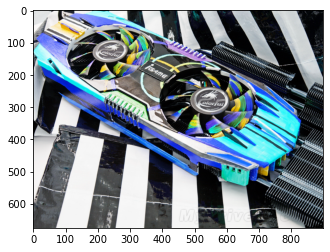

In [3]:
plt.imshow(img)

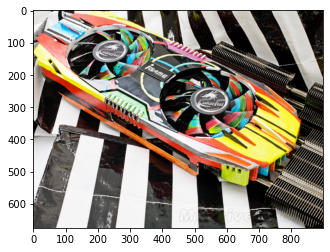

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Changing Color Space

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

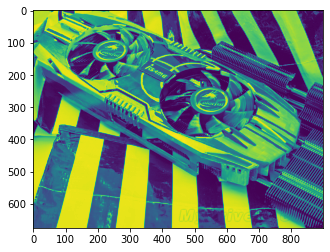

In [6]:
plt.imshow(gray)

## Saving Images

In [7]:
cv2.imwrite('gray.jpg', gray)

True

# Resizing

In [8]:
img.shape[:-1]


(675, 900)

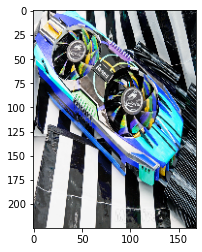

In [9]:
height, width = img.shape[:-1]
big_image = cv2.resize(img, (height//4, width//4))

big_image = cv2.cvtColor(big_image, cv2.COLOR_BGR2RGB)
plt.imshow(big_image)

# Cropping

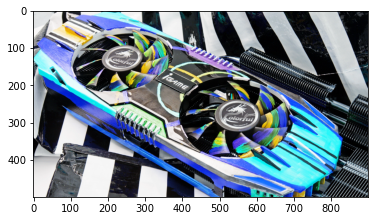

In [10]:
img_crop = img[0:500, 0:1000]

img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)
plt.imshow(img_crop)

# Filters

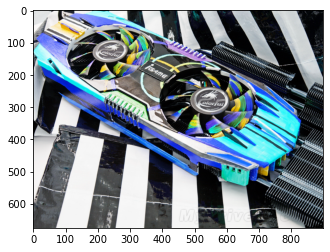

In [11]:
import numpy as np

kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

# here second argument means the depth of the output image. 
# If you set this argument to -1 then the output image will have the same depth as input image.
filtered = cv2.filter2D(img, -1, kernel)

filtered = cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB)
plt.imshow(filtered)

## Gaussian Blur

Takes img, kernel size, standard deviation. If std is 0 then it is calculated from kernel size.

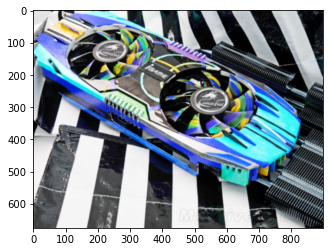

In [12]:
gaussian = cv2.GaussianBlur(img, (5, 5), 0)

gaussian = cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB)
plt.imshow(gaussian)

# Edge Detection

## Canny Edge Detector

First argument is grayscale image, then lower threshold, upper threshold and then kernel size which is by default 3.

The edge pixels above the upper threshold are considered in an edge map and edge pixels below the threshold are discarded. The pixel in between the thresholds are considered only if they are connected to pixels in upper threshold. Thus we get a clean edge map.

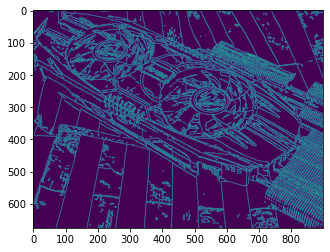

In [13]:
edges = cv2.Canny(gray, 100, 200, 3)

#edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(edges)

# Feature Detection

## SIFT

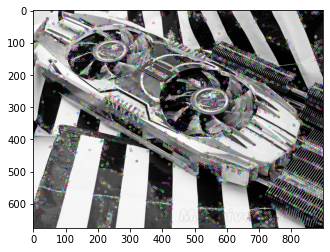

In [14]:
sift_img = cv2.imread('test2.jpg')
gray = cv2.cvtColor(sift_img, cv2.COLOR_BGR2GRAY)

sift_obj = cv2.xfeatures2d.SIFT_create()

# you can also pass a mask in place of None if you want to find features in a specific region.
keypoints = sift_obj.detect(gray)

drawn = cv2.drawKeypoints(gray, keypoints, sift_img)
cv2.imwrite('sift.jpg', drawn)
drawn = cv2.cvtColor(drawn, cv2.COLOR_BGR2RGB)
plt.imshow(drawn)

## Feature Matching

In [15]:
img_rot = cv2.imread('test2.jpg')
gray_rot = cv2.cvtColor(img_rot, cv2.COLOR_BGR2GRAY)

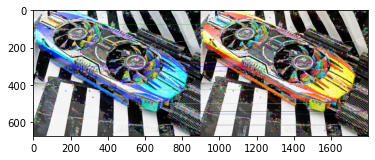

In [16]:
import random

sift = cv2.xfeatures2d.SIFT_create()

# detectAndCompute will find keypoints as well as compute the descriptors
# descriptors store information about keypoints that make them distinguishable
kp, desc = sift.detectAndCompute(gray, None)
kp_rot, desc_rot = sift.detectAndCompute(gray_rot, None)

# this is will match the descriptors and find the ones that are similar
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc, desc_rot, k=2)

good = []
for m, n in matches:
    # applying the ratio test to filter out the bad matches due to noise
    # since we set k=2 in bf.knnMatch() we have two matches for each keypoint
    # the first one is the best and the second one of the second best
    # we are decreasing the value of the worst match and checking whether its
    # value becomes smaller then the best match. If it does then that match is discarded
    if m.distance < 0.4 * n.distance:
        good.append([m])

random.shuffle(good)
image_match = cv2.drawMatchesKnn(img, kp, img_rot, kp_rot, good[:10], outImg=None)

image_match = cv2.cvtColor(image_match, cv2.COLOR_BGR2RGB)
cv2.imwrite('qwerty.jpg', drawn)

plt.imshow(image_match)

# Resources

- https://docs.opencv.org/master/index.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
- https://www.youtube.com/playlist?list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq